# Проект
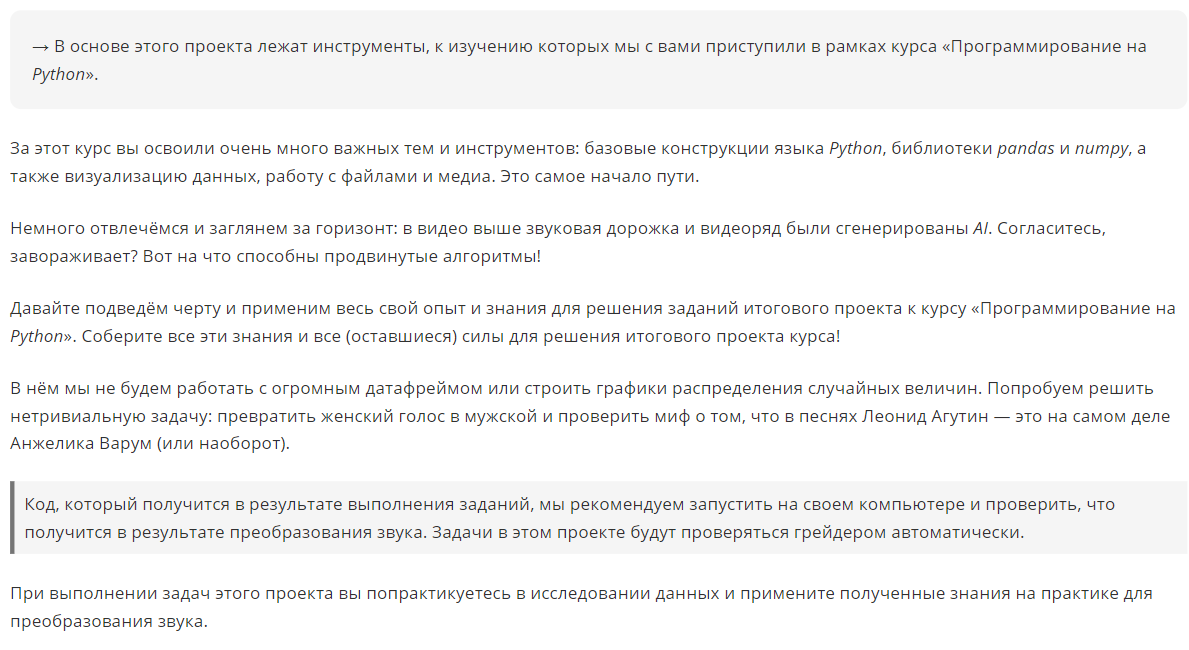

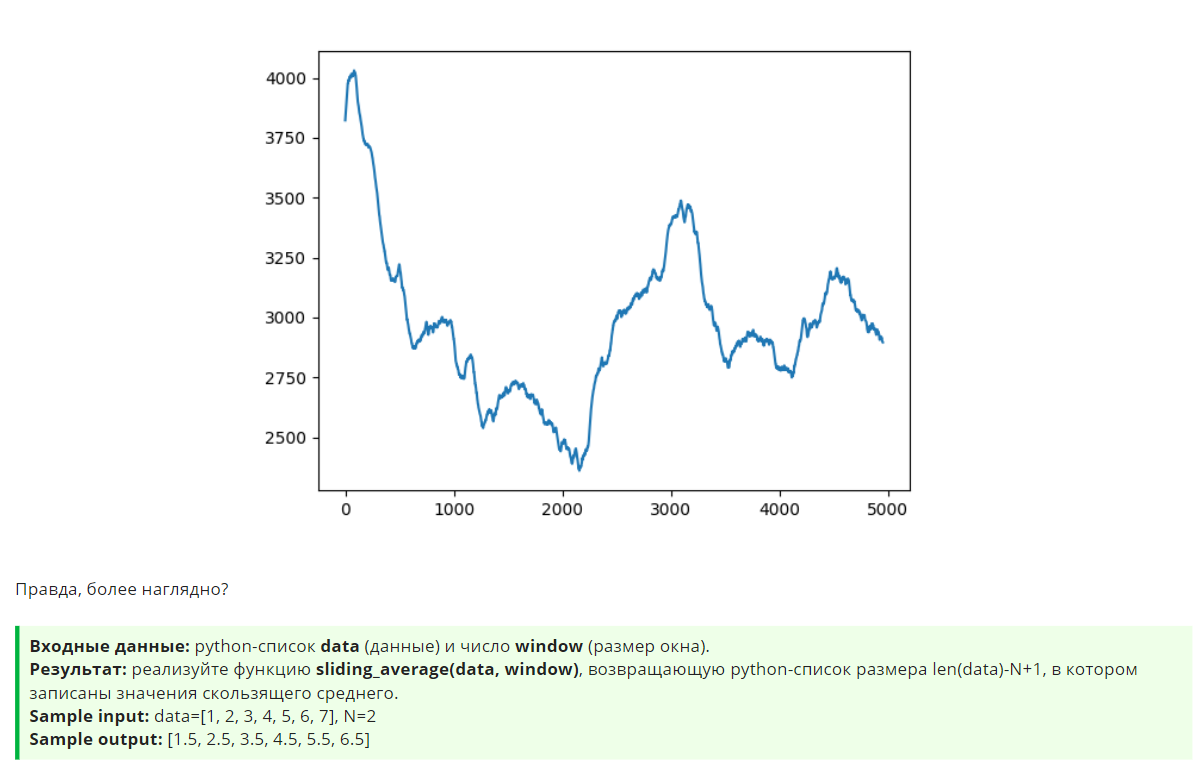
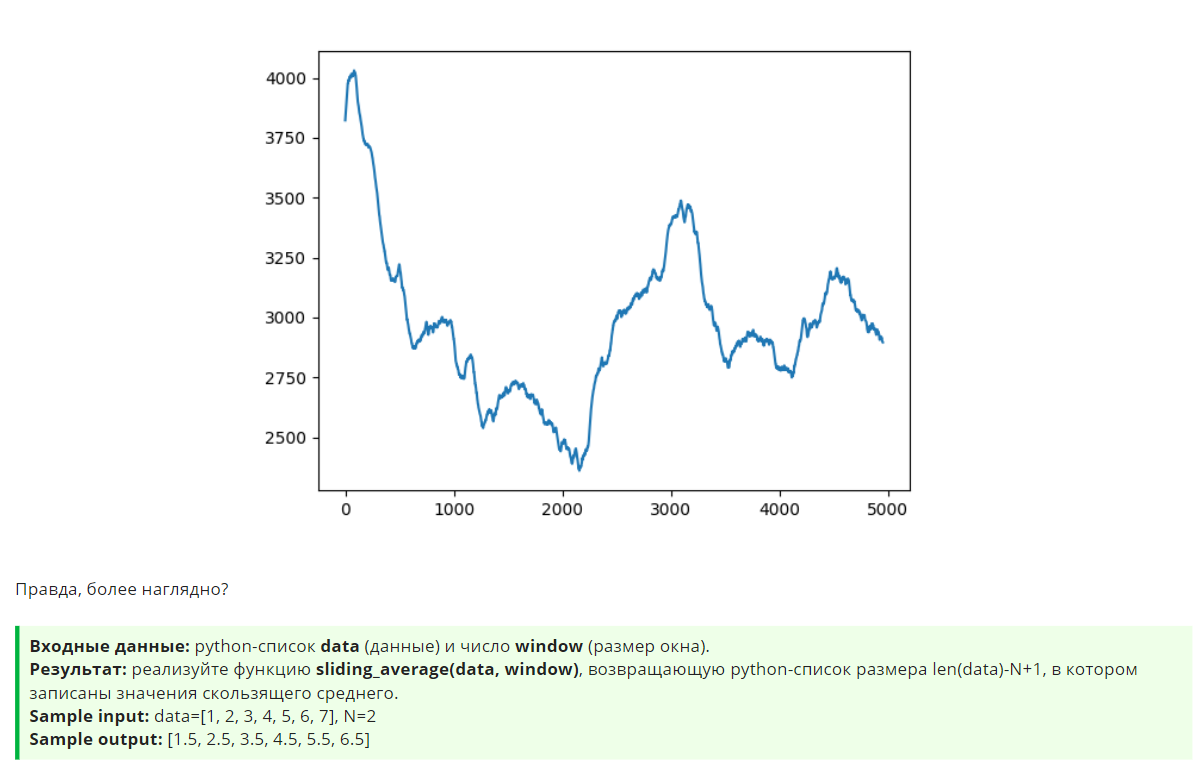

In [64]:
def liding_average(data, window):
    result = []
    for i in range(len(data)-window+1):
        result.append(sum(data[i:i+window])/window)
    return result
    
    
data=[1, 2, 3, 4, 5, 6, 7]
N=2
liding_average(data, N)

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

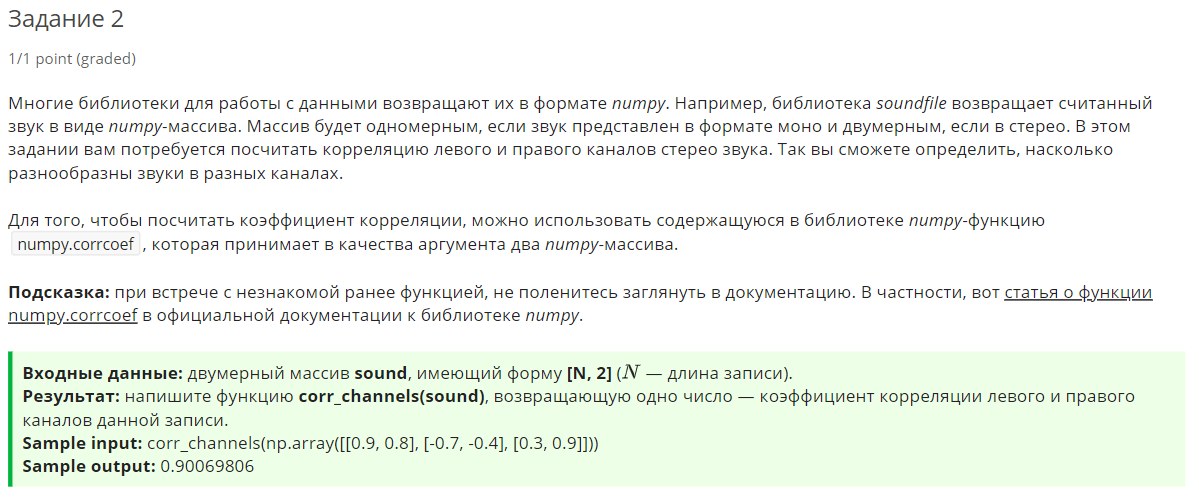

In [1]:
def corr_channels(sound):
    from numpy import corrcoef
    return corrcoef(sound.T)[0,1]

import numpy as np
corr_channels(np.array([[0.9, 0.8], [-0.7, -0.4], [0.3, 0.9]]))

0.9006980553277449

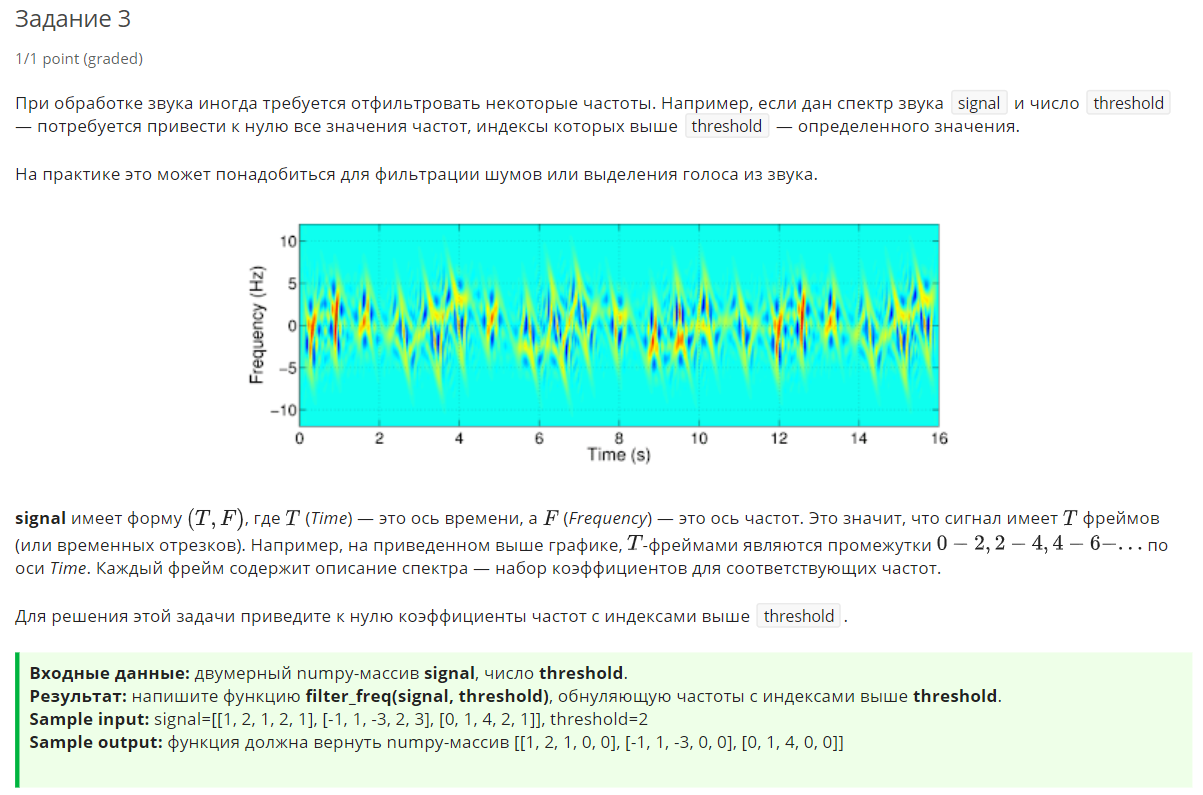

In [67]:
def filter_freq(signal, threshold):
    for a in range(len(signal)):
        for i in range(threshold+1,len(signal[a])):
            signal[a][i]=0
    return signal
    
    
signal=[[1, 2, 1, 2, 1], [-1, 1, -3, 2, 3], [0, 1, 4, 2, 1]]
threshold=2
filter_freq(signal, threshold)

[[1, 2, 1, 0, 0], [-1, 1, -3, 0, 0], [0, 1, 4, 0, 0]]

# Преобразование Фурье

При преобразовании Фурье мы получаем что-то вроде формулы ниже. 
Получаем здесь сумму из неких элементарных звуков для нашего сигнала, изменение коэффициентов которых влияет по разному (так как коэффициенты могут быть и отрицательные, и положительные). Но мы можем умножить коэффициенты при членах разложения, чтобы как бы не менять структуру звука, а лишь характеристики

<center>${\hat  {f}}(\omega )={\frac  {1}{{\sqrt  {2\pi }}}}\int \limits _{{-\infty }}^{{\infty }}f(x)e^{{-ix\omega }}\,dx.$</center>

In [88]:
import soundfile as sf                  # импортируем библиотеку для работы с wav
data, samplerate = sf.read(r'C:\Users\snkna\Downloads\agutin_varum.wav')
print('отсчетов в секунду',samplerate)

отсчетов в секунду 48000


1. У нас временной ряд с частотой отсчетов, например, 48к - это 48000 отсчетов в секунду.
2. Бьем его на куски по 50 мс - по 2400 отсчетов в каждом куске. А этот кусок уже представляем в виде разложения на 2400 частот, получаем 2400 коэффициентов при этих частотах.
3. Функция transform эти коэффициенты сдвигает.

In [76]:
import numpy as np
import scipy.fftpack                      # библиотека для выполнения преобразования Фурье

def transform(x, mult):
    """понижает или повышает частоты в зависимости от множителя mult 
    (например, при mult=2 произойдёт понижение на одну октаву, а при mult=1/2
    высота будет повышена на октаву), при i = 2 (mult = 2) --> k = 1. При i = 3 --> k = 1"""
    n = len(x)
    y = np.zeros([n], dtype=np.cdouble)    # y - преобразованный сигнал
    for i in range(0, n // 2):
        k = int(i / mult)            # k - откуда переложить, i - куда переложить
        if k >= n / 2:
            continue
        y[i] = x[k]                                     # переставляем частоты
        y[n - i - 1] = x[n - k - 1]
    return y

def process_frames(name, window):
    """проходит по всем промежуткам по мс и преобразовывает сигнал. Сначала она запускает 
    преобразование Фурье на каждом из промежутков, затем переставляет частоты, используя 
    предыдущую функцию, и выполняет обратное преобразование Фурье"""
    
    sig, samplerate = sf.read(name)                     # читаем файл в память в виде numpy-массива
    if len(sig.shape) == 2:
        sig = sig[:, 0]
    step = int(samplerate * window)                     # переводим окно из миллисекунд в сигналы
    data, embeddings = [], []
    for i in range(0, sig.shape[0] - step, step):
        y = sig[i : i + step]
        y = scipy.fftpack.fft(y)                 # прямое преобразование Фурье
        embeddings.append(np.abs(y))             # функция embeddings.append понадобится для визуализации данных в четвертом проектном задании
        y = transform(y, 1/2**(4/12))                        # переставляем частоты
        y = scipy.fftpack.ifft(y)                 # производим обратное преобразование
        data += list(map(lambda x: x.real, y))
    sf.write('test.wav', data, samplerate)         # записываем результат в файл
    
    
    


1. У нас временной ряд с частотой отсчетов, например, 48к - это 48000 отсчетов в секунду.
2. Бьем его на куски по 50 мс - по 2400 отсчетов в каждом куске. А этот кусок уже представляем в виде разложения на 2400 частот, получаем 2400 коэффициентов при этих частотах.
3. Функция transform эти коэффициенты сдвигает.

In [ ]:
process_frames(r'C:\Users\snkna\Downloads\agutin_varum.wav',0.050)

In [71]:
def transform2d(data):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=0)
    return tsne.fit_transform(data)
data=np.array([[1, 2, 3], [2, 1, 3], [4, 5, 6], [5, 4, 6]])
transform2d(data) 

array([[ 269.5624   , -124.8034   ],
       [   1.7829943, -295.07968  ],
       [ 220.81143  , -343.83212  ],
       [  50.533993 ,  -76.050934 ]], dtype=float32)

# Задание 4
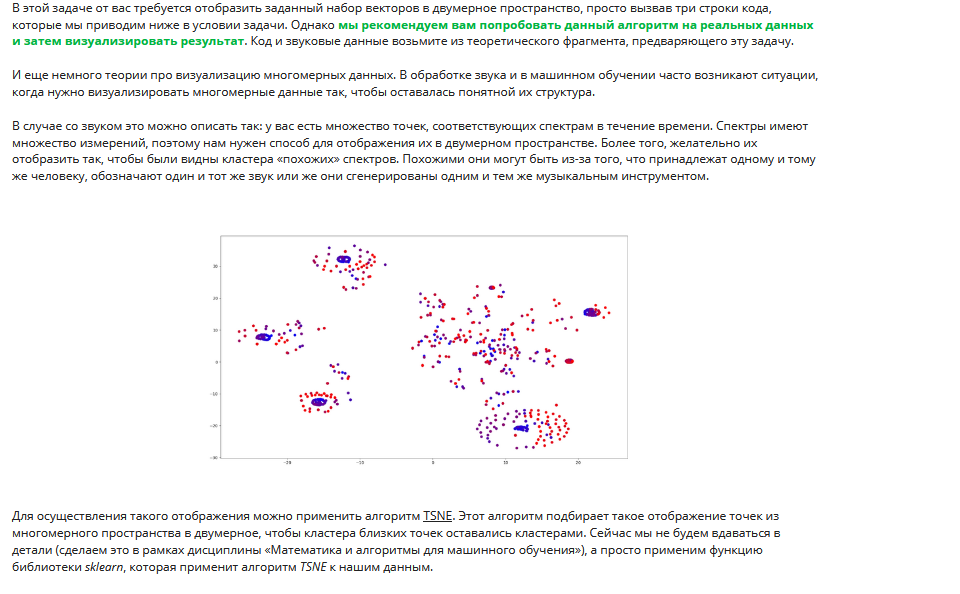

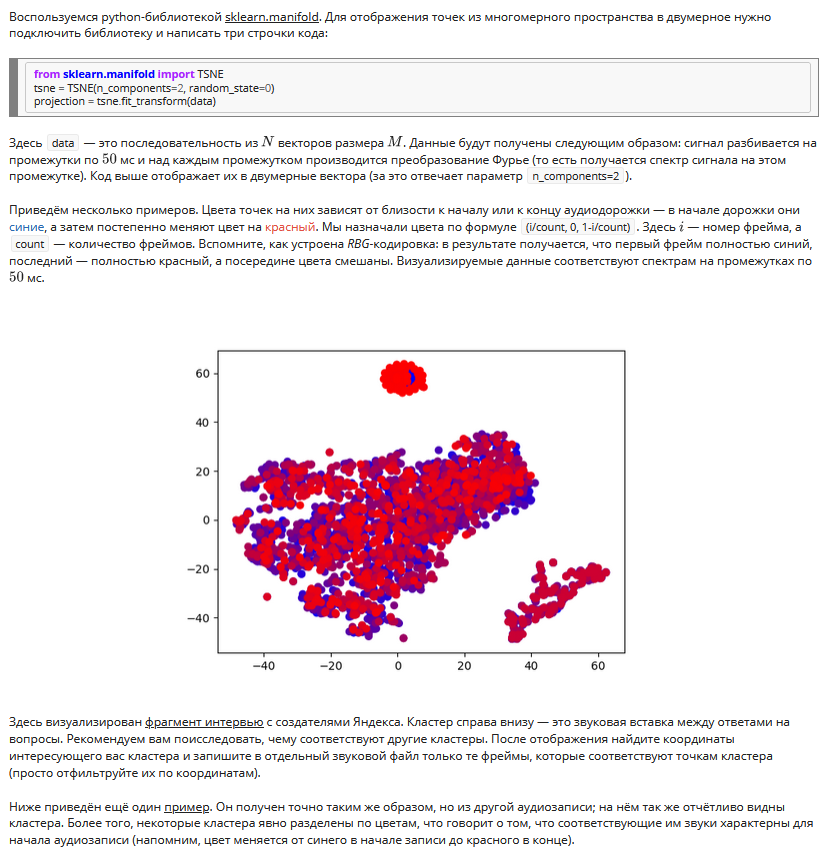

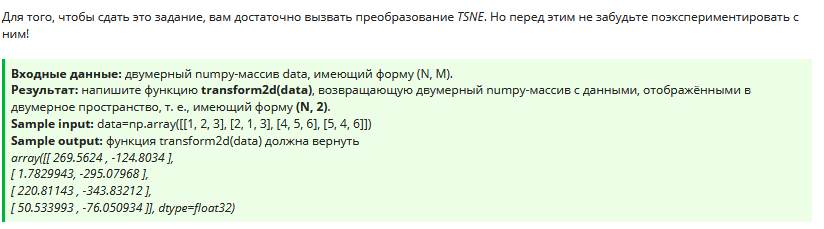

In [4]:
def transform2d(data):
    from sklearn.manifold import TSNE
    pca = TSNE(n_components=2, random_state=0)
    return pca.fit_transform(data)

data=np.array([[1, 2, 3], [2, 1, 3], [4, 5, 6], [5, 4, 6]])
transform2d(data)

array([[ 269.5624   , -124.8034   ],
       [   1.7829943, -295.07968  ],
       [ 220.81143  , -343.83212  ],
       [  50.533993 ,  -76.050934 ]], dtype=float32)

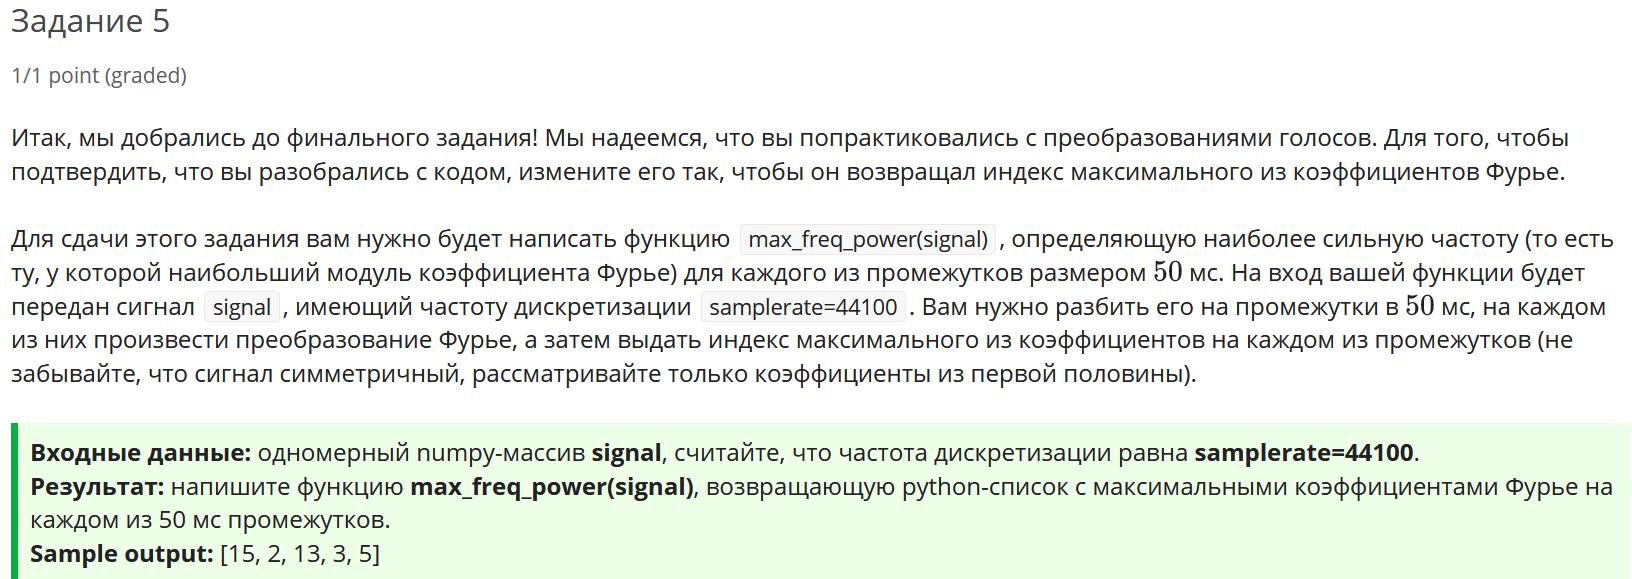

In [6]:
def max_freq_power(sig, samplerate = 44100, window = 0.05):
    if len(sig.shape) == 2:
        sig = sig[:, 0]
    step = int(samplerate * window)
    data, embeddings = [], []
    for i in range(0, sig.shape[0] - step, step):
        y = sig[i : i + step]
        y = y[:y.shape[0]//2]
        y = scipy.fftpack.fft(y) 
        embeddings.append(np.argmax(y))
    return np.abs(embeddings)